In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

tweets = pd.read_csv('/data/train.csv')
test = pd.read_csv('/data/test.csv')



Mounted at /content/mydrive


Results with the TeYang Lau Preprocessing :[Gyazo](https://gyazo.com/50b20b8461c1c989cb0456638c594f63)
Results without Preprocessing at all : [Gyazo](https://gyazo.com/b4bdd32f8a1b4937c6f8903c2966b249)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(tweets.text.astype(str))
Y=tweets.target


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [ ]:
mlscores=[]

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegressionCV,Lasso
from sklearn import metrics



### **MultinomialNB**

In [ ]:
grid_params = {
  'alpha': np.linspace(0.001, 1, 1000),
  'fit_prior': [True, False],  
}

aa=MultinomialNB()
clf = GridSearchCV(aa, grid_params)
clf.fit(X_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)
mnb = MultinomialNB(alpha=clf.best_params_['alpha'],fit_prior=False)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlscores.append(["MultinomialNB1",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.auc(fpr, tpr)])


Best Score:  0.79768860387622
Best Params:  {'alpha': 0.279, 'fit_prior': True}
Bernoulli F1 score: 0.749
Precision: 0.7688243064729194
Recall: 0.7302383939774153
confusion matrix: [[932 175]
 [215 582]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1107
           1       0.77      0.73      0.75       797

    accuracy                           0.80      1904
   macro avg       0.79      0.79      0.79      1904
weighted avg       0.79      0.80      0.79      1904



best alpha is  0.145
Bernoulli F1 score: 0.745
Precision: 0.7541827541827542
Recall: 0.7352572145545797
confusion matrix: [[916 191]
 [211 586]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1107
           1       0.75      0.74      0.74       797

    accuracy                           0.79      1904
   macro avg       0.78      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904



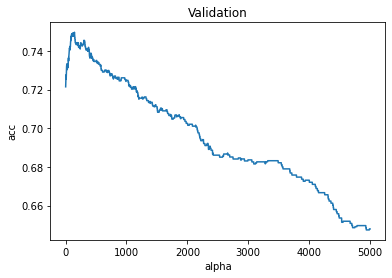

In [ ]:
alphas=[x for x in range(1,5001,1)]
clfx = [metrics.f1_score(y_test,MultinomialNB(alpha=alpha/1000).fit(X_train, y_train)
.predict(X_test)  )for alpha in alphas]
aa=alphas[clfx.index(max(clfx))]/1000
print("best alpha is " ,aa)
clfx = pd.Series(clfx, index = alphas)
clfx.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("acc")
mnb = MultinomialNB(alpha=aa,fit_prior=False)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlscores.append(["MultinomialNB2",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.auc(fpr, tpr)])

### **BernoulliNB**

In [ ]:
grid_params = {
  'alpha': np.linspace(0.001, 1, 1000),
  'fit_prior': [True, False],  
}

aa=BernoulliNB()
clf = GridSearchCV(aa, grid_params)
clf.fit(X_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)
bnb_imp = BernoulliNB(alpha=clf.best_params_['alpha'],fit_prior=False)
bnb_imp.fit(X_train, y_train)
y_pred = bnb_imp.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlscores.append(["BernoulliNB1",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.auc(fpr, tpr)])

Best Score:  0.8022403305546645
Best Params:  {'alpha': 0.663, 'fit_prior': False}
Bernoulli F1 score: 0.748
Precision: 0.8108504398826979
Recall: 0.6938519447929736
confusion matrix: [[978 129]
 [244 553]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1107
           1       0.81      0.69      0.75       797

    accuracy                           0.80      1904
   macro avg       0.81      0.79      0.79      1904
weighted avg       0.80      0.80      0.80      1904



best alpha is  0.626
Bernoulli F1 score: 0.751
Precision: 0.8098693759071117
Recall: 0.7001254705144291
confusion matrix: [[976 131]
 [239 558]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1107
           1       0.81      0.70      0.75       797

    accuracy                           0.81      1904
   macro avg       0.81      0.79      0.80      1904
weighted avg       0.81      0.81      0.80      1904



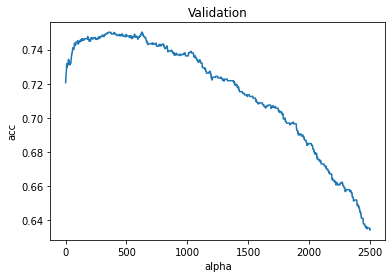

In [ ]:
alphas=[x for x in range(1,2500,1)]
clfx = [(metrics.f1_score(y_test,BernoulliNB(alpha=alpha/1000).fit(X_train, y_train)
.predict(X_test))) for alpha in alphas]
aa=alphas[clfx.index(max(clfx))]/1000
print("best alpha is " ,aa)
clfx = pd.Series(clfx, index = alphas)
clfx.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("acc")
bnb_imp = BernoulliNB(alpha=aa,fit_prior=False)
bnb_imp.fit(X_train, y_train)
y_pred = bnb_imp.predict(X_test)
print("Bernoulli F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlscores.append(["BernoulliNB2",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.auc(fpr, tpr)])

### **GaussianNB**:

In [ ]:
gnb= GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Gaussian's F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlscores.append(["GaussianNB",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.auc(fpr, tpr)])

Gaussian's F1 score: 0.632
Precision: 0.5352480417754569
Recall: 0.7716436637390214
confusion matrix: [[573 534]
 [182 615]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1107
           1       0.54      0.77      0.63       797

    accuracy                           0.62      1904
   macro avg       0.65      0.64      0.62      1904
weighted avg       0.67      0.62      0.62      1904



### **Logistic Regression**

In [ ]:
LRCV = LogisticRegressionCV(Cs=50,
                            cv=10,
                            scoring='balanced_accuracy',
                            random_state=0,
                            n_jobs=-1,
                            verbose=3,
                            solver="liblinear",
                            max_iter=300).fit(X_train,y_train)
y_pred = LRCV.predict(X_test)
print("LRCV F1 score: %.3f" % metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlscores.append(["LogisticRegressionCV",metrics.f1_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.auc(fpr, tpr)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LibLinear]LRCV F1 score: 0.757
Precision: 0.8350983358547656
Recall: 0.6925972396486826
confusion matrix: [[998 109]
 [245 552]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1107
           1       0.84      0.69      0.76       797

    accuracy                           0.81      1904
   macro avg       0.82      0.80      0.80      1904
weighted avg       0.82      0.81      0.81      1904



[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.1s finished


In [ ]:
pd.DataFrame(mlscores).sort_values(by=[1], ascending=False)

,0,1,2,3,4
5,LogisticRegressionCV,0.757202,0.835098,0.692597,0.797066
3,BernoulliNB2,0.751009,0.809869,0.700125,0.790894
0,MultinomialNB1,0.749035,0.768824,0.730238,0.786077
2,BernoulliNB1,0.747803,0.810850,0.693852,0.788660
1,MultinomialNB2,0.744600,0.754183,0.735257,0.781359
4,GaussianNB,0.632066,0.535248,0.771644,0.644629
